# Future City Temperature Predictions 

In [1]:
from pandas_datareader import data as pdr #read data from yahoo finance api
import matplotlib.pyplot as plt #viz #GUI manager
import seaborn as sns #viz #plotly is another package
import datetime
import pandas as pd
import numpy as np
from pandas import Grouper #groupby
#statistical data exploration, conducting statistical tests, and estimation of different statistical models
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf #autocorrelation plot
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing # double and triple exponential smoothing
from pandas.plotting import autocorrelation_plot #autocorrelation plot
from statsmodels.graphics.gofplots import qqplot #residual diagnostics
from sklearn.metrics import mean_squared_error #accuracy metrics
from math import sqrt
from sklearn.metrics import mean_absolute_error #accuracy metrics

from random import gauss #create gaussian white noise
from random import seed
from pandas import Series

from statsmodels.tsa.stattools import adfuller # Augmented Dickey Fuller test for testing stationarity

from statsmodels.tsa.arima_model import ARIMA #for manual ARIMA

import pmdarima as pm #auto arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing

from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
top_50_df = pd.read_csv('../../Data/Cleaned/top_50_world_city_temp.csv',
                            parse_dates=['dt'],
                            index_col=['dt'])
top_50_df

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
dt,,,,,,
1900-02-01,3.219,0.699,Atlanta,United States,34.56N,83.68W
1900-03-01,8.194,0.230,Atlanta,United States,34.56N,83.68W
1900-04-01,14.339,0.413,Atlanta,United States,34.56N,83.68W
1900-05-01,18.433,0.524,Atlanta,United States,34.56N,83.68W
1900-06-01,21.791,1.235,Atlanta,United States,34.56N,83.68W
...,...,...,...,...,...,...
2013-04-01,21.968,0.809,Hong Kong,China,21.70N,113.37E
2013-05-01,26.226,0.402,Hong Kong,China,21.70N,113.37E
2013-06-01,28.283,0.503,Hong Kong,China,21.70N,113.37E


## Please enter the city of interest below. Current city options are shown below.

In [3]:
top_50_df['City'].unique()

array(['Atlanta', 'Bangkok', 'Barcelona', 'Mumbai', 'Boston', 'Cairo',
       'Kolkata', 'Chicago', 'Dallas', 'Delhi', 'Denver', 'Detroit',
       'Tehran', 'Guangzhou', 'Houston', 'Istanbul', 'Jakarta', 'Osaka',
       'Buenos Aires', 'London', 'Los Angeles', 'Madrid', 'Manila',
       'Melbourne', 'Mexico City', 'Miami', 'Milan', 'Minneapolis',
       'Montreal', 'Moscow', 'New York', 'Paris', 'Beijing',
       'Philadelphia', 'Phoenix', 'Rio de Janeiro', 'Riyadh', 'Rome',
       'Sao Paulo', 'San Diego', 'San Francisco', 'Seattle', 'Seoul',
       'Shanghai', 'Singapore', 'Sydney', 'Tokyo', 'Toronto',
       'Washington DC', 'Hong Kong'], dtype=object)

In [4]:
city_chosen = input("Please enter the city you want temperature predictions for: ")
years_chosen = int(input("Please enter the number of years you want temperature predictions for: "))
print(f"You have chosen '{city_chosen}'. We will now get you future temperature predictions!")

Please enter the city you want temperature predictions for: Tokyo
Please enter the number of years you want temperature predictions for: 10
You have chosen 'Tokyo'. We will now get you future temperature predictions!


In [5]:
chosen_city_df = top_50_df[top_50_df['City'] == city_chosen]

In [6]:
chosen_city_df

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
dt,,,,,,
1900-02-01,0.932,0.528,Tokyo,Japan,36.17N,139.23E
1900-03-01,4.175,0.214,Tokyo,Japan,36.17N,139.23E
1900-04-01,10.210,0.342,Tokyo,Japan,36.17N,139.23E
1900-05-01,16.124,0.469,Tokyo,Japan,36.17N,139.23E
1900-06-01,18.475,0.435,Tokyo,Japan,36.17N,139.23E
...,...,...,...,...,...,...
2013-04-01,11.310,0.493,Tokyo,Japan,36.17N,139.23E
2013-05-01,16.757,0.396,Tokyo,Japan,36.17N,139.23E
2013-06-01,20.927,0.489,Tokyo,Japan,36.17N,139.23E


In [7]:
temperature_df = chosen_city_df['AverageTemperature']
temperature_df = temperature_df.to_frame()
temperature_df                 

,AverageTemperature
dt,
1900-02-01,0.932
1900-03-01,4.175
1900-04-01,10.210
1900-05-01,16.124
1900-06-01,18.475
...,...
2013-04-01,11.310
2013-05-01,16.757
2013-06-01,20.927


<Axes: xlabel='dt'>

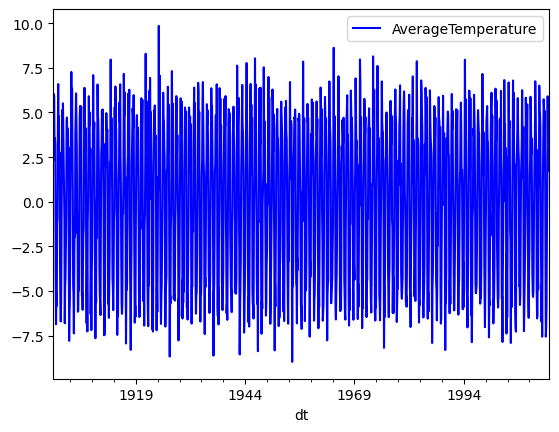

In [8]:
#create differenced dataset
first_diff_df = temperature_df.diff().dropna()
first_diff_df.plot(color='blue')

In [9]:
X = first_diff_df.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -13.803330
p-value: 0.000000
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


# Our data is showing stationary so we can proceed with modeling.

In [10]:
print("Years chosen:", years_chosen)

Years chosen: 10


# Train Test Split

In [11]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(temperature_df, test_size= 12 * years_chosen, random_state=25, shuffle = False)
#shuffle = False is very important to ensure the order of the data

print(f"No. of training examples: {train_data.shape[0]}")
print(f"No. of testing examples: {test_data.shape[0]}")

No. of training examples: 1243
No. of testing examples: 120


In [12]:
train_data

,AverageTemperature
dt,
1900-02-01,0.932
1900-03-01,4.175
1900-04-01,10.210
1900-05-01,16.124
1900-06-01,18.475
...,...
2003-04-01,12.088
2003-05-01,16.532
2003-06-01,20.775


In [13]:
test_data

,AverageTemperature
dt,
2003-09-01,21.429
2003-10-01,14.056
2003-11-01,11.183
2003-12-01,4.719
2004-01-01,1.898
...,...
2013-04-01,11.310
2013-05-01,16.757
2013-06-01,20.927


# Evaluator Function 
We can use this to evaluate our different models

In [14]:
def evaluate_model(model, test_data):
    # Make predictions
    predictions = model.predict(start=test_data.index[0], end=test_data.index[-1])

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(test_data, predictions)

    return mse, predictions

# Auto ARIMA 
Note that our data was showing stationarity after doing a first order difference, which would indicate to us that the model does not have a seasonal component. However, we can let the auto ARIMA test whether we need to do differencing for trend and seasonality simply by setting d and D equal to "None". This will make our code more robust. 

In [15]:
smodel = pm.auto_arima(train_data, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=None, trace=True,
                         error_action='ignore',
                         suppress_warnings=True,
                         stepwise=True, return_valid_fits=True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=5957.448, Time=0.60 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=8755.070, Time=0.05 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.77 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=6600.453, Time=0.68 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=10275.480, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=6421.884, Time=0.15 sec
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=inf, Time=2.19 sec
 ARIMA(1,0,1)(0,0,2)[12] intercept   : AIC=5601.703, Time=2.24 sec
 ARIMA(1,0,1)(1,0,2)[12] intercept   : AIC=inf, Time=5.56 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=6014.423, Time=2.01 sec
 ARIMA(1,0,0)(0,0,2)[12] intercept   : AIC=5728.111, Time=1.41 sec
 ARIMA(2,0,1)(0,0,2)[12] intercept   : AIC=4540.895, Time=6.13 sec
 ARIMA(2,0,1)(0,0,1)[12] intercept   : AIC=4584.203, Time=2.14 sec
 ARIMA(2,0,1)(1,0,2)[12] intercept   : AIC=inf, Time=6.16 sec
 ARIMA(2,0,1)(1,0,1)[12] intercept   :

# Best ARIMA Models

We set return_valid_fits=True so we can now directly access the best models as the are stored in order of best to worst by the auto ARIMA. We will take the best 3 models. 

In [16]:
best_model = smodel[0]
second_best_model = smodel[1]
third_best_model = smodel[2]

In [17]:
print(best_model)
print(second_best_model)
print(third_best_model)

 ARIMA(3,0,0)(1,0,1)[12] intercept
 ARIMA(3,0,0)(2,0,1)[12] intercept
 ARIMA(3,0,0)(1,0,2)[12] intercept


In [18]:
best_order = smodel[0].order
best_order_seasonal = smodel[0].seasonal_order

second_best_order = smodel[1].order
second_best_order_seasonal = smodel[1].seasonal_order


third_best_order = smodel[2].order
third_best_order_seasonal = smodel[2].seasonal_order

In [19]:
print(best_order,best_order_seasonal)
print(second_best_order,second_best_order_seasonal)
print(third_best_order,third_best_order_seasonal)

(3, 0, 0) (1, 0, 1, 12)
(3, 0, 0) (2, 0, 1, 12)
(3, 0, 0) (1, 0, 2, 12)


In [20]:
best_model = SARIMAX(train_data, order=best_order, seasonal_order=best_order_seasonal)
best_model_fit = best_model.fit(disp=False)

/Users/merrill/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/merrill/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/merrill/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/Users/merrill/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [21]:
second_best_model = SARIMAX(train_data ,order=second_best_order, seasonal_order=second_best_order_seasonal)
second_best_model_fit = second_best_model.fit(disp=False)

/Users/merrill/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/merrill/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/merrill/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/Users/merrill/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [22]:
third_best_model = SARIMAX(train_data, order=third_best_order, seasonal_order=third_best_order_seasonal)
third_best_model_fit = third_best_model.fit(disp=False)

/Users/merrill/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/merrill/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/merrill/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/Users/merrill/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [23]:
mse_best_model, predictions_best_model = evaluate_model(best_model_fit, test_data)

In [24]:
mse_second_best_model, predictions_second_best_model = evaluate_model(second_best_model_fit, test_data)

In [25]:
mse_third_best_model, predictions_third_best_model = evaluate_model(third_best_model_fit, test_data)

# Exponential Smoothing Models

In [26]:
ets_model_add_add = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=12)



/Users/merrill/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [27]:
ets_model_add_add_fit = ets_model_add_add.fit()

In [28]:
mse_ets_add_add, predictions_ets_add_add = evaluate_model(ets_model_add_add_fit, test_data)

NOTE: If we want to use multiplicative we need to do some data transformation. We may want to run a model with our trend = 'mul' since we may be thinking of things like gloabl warming. However, we do not need seasonal = 'mul'. 

In [29]:
# ets_model_add_add = ExponentialSmoothing(train_data, trend='mul', seasonal='add', seasonal_periods=12)
# #ets_model_add_add_fit = ets_model_add_add.fit()

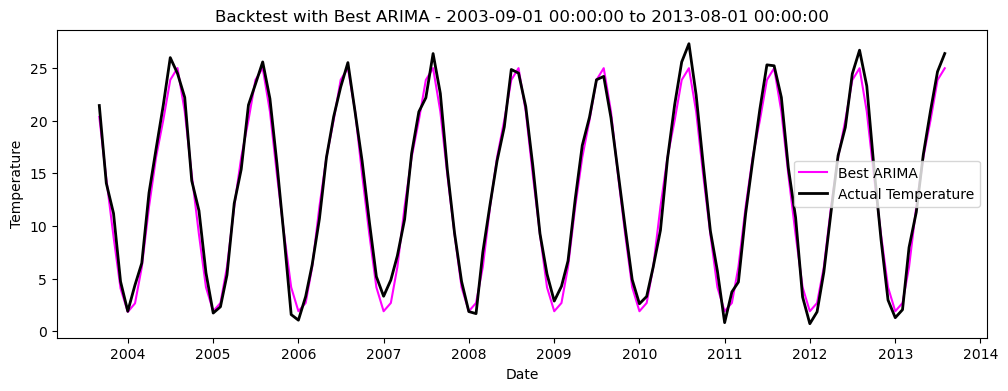

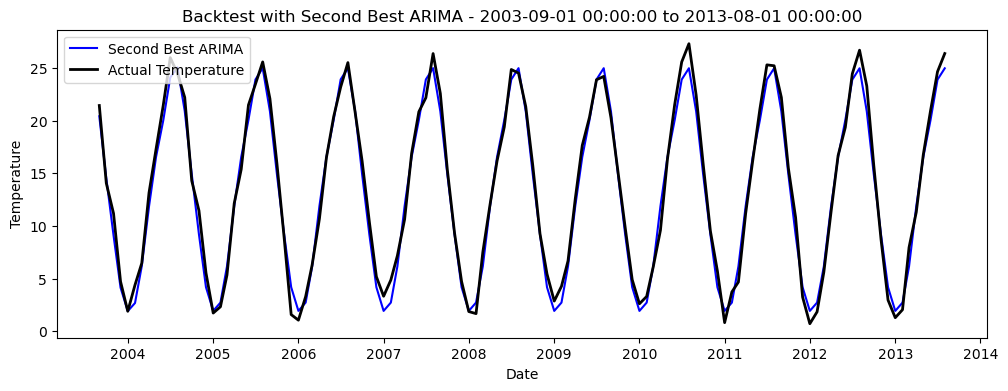

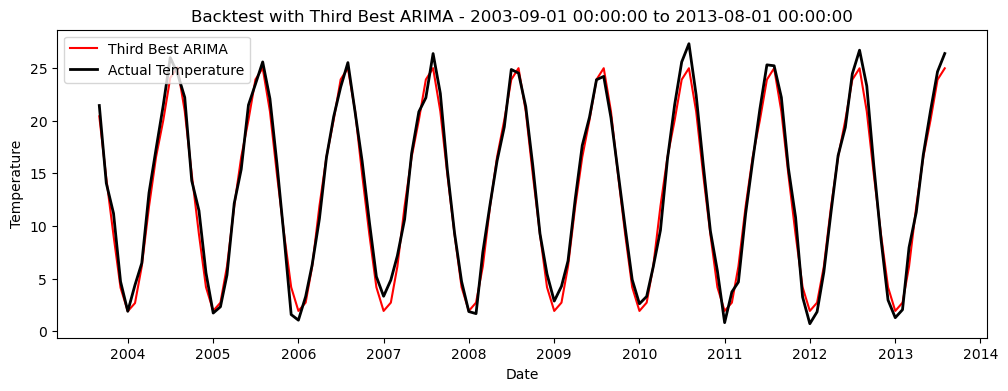

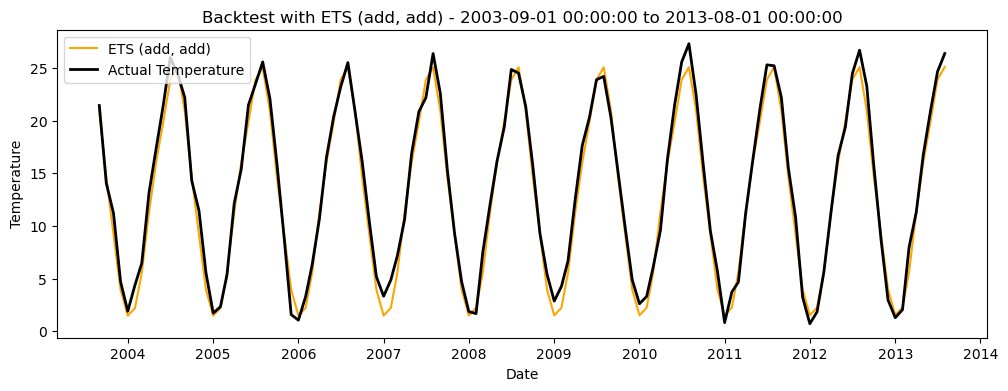

In [30]:
plt.figure(figsize=(12, 4))
plt.plot(test_data.index, predictions_best_model, label='Best ARIMA', color = "magenta")
plt.plot(test_data.index, test_data['AverageTemperature'], label='Actual Temperature', color='black', linewidth=2)
plt.title(f'Backtest with Best ARIMA - {test_data.index[0]} to {test_data.index[-1]}')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.savefig("ARIMA_World_" + str(years_chosen) + "_year_" + str(city_chosen) + ".png")
plt.show()

# Plot for ARIMA model 2 "Second Best"
plt.figure(figsize=(12, 4))
plt.plot(test_data.index, predictions_second_best_model, label='Second Best ARIMA', color = "blue")
plt.plot(test_data.index, test_data['AverageTemperature'], label='Actual Temperature', color='black', linewidth=2)
plt.title(f'Backtest with Second Best ARIMA - {test_data.index[0]} to {test_data.index[-1]}')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

# Plot for ARIMA model 3 "Third Best"
plt.figure(figsize=(12, 4))
plt.plot(test_data.index, predictions_third_best_model, label='Third Best ARIMA', color = "red")
plt.plot(test_data.index, test_data['AverageTemperature'], label='Actual Temperature', color='black', linewidth=2)
plt.title(f'Backtest with Third Best ARIMA - {test_data.index[0]} to {test_data.index[-1]}')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()
    
plt.figure(figsize=(12, 4))
plt.plot(test_data.index, predictions_ets_add_add, label='ETS (add, add)', color = "orange")
plt.plot(test_data.index, test_data['AverageTemperature'], label='Actual Temperature', color='black', linewidth=2)
plt.title(f'Backtest with ETS (add, add) - {test_data.index[0]} to {test_data.index[-1]}')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.savefig("ETS_World_" + str(years_chosen) + "_year_" + str(city_chosen) + ".png")

plt.show()


In [34]:
print(f"MSE for the first ARIMA model: {mse_best_model}")
print(f"MSE for the second best ARIMA model: {mse_second_best_model}")
print(f"MSE for the third best ARIMA model: {mse_third_best_model}")
print(f"MSE for the ETS model: {mse_ets_add_add}")

MSE for the first ARIMA model: 1.1821627670251862
MSE for the second best ARIMA model: 1.1582781324738518
MSE for the third best ARIMA model: 1.160826845190543
MSE for the ETS model: 1.3272652748387548
